## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organization specializes in emergency response, preparedness, and risk mitigation.  

### Data set Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [11]:
# Import the data set
country_df = pd.read_csv('Country-data.csv',index_col=0)

In [6]:
# To check if there are non-numeric features
print(country_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB
None


In [7]:
# Check the shape
print(country_df.shape)

(167, 9)


In [8]:
# Check datatypes & counts
print(country_df.dtypes)
print(country_df.dtypes.value_counts())

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object
float64    7
int64      2
dtype: int64


In [9]:
# Get descriptive statistics
print(country_df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

In [10]:
# Identify any missing data
print(country_df.isnull().sum(), end='\n\n')

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64



## Preprocessing and Feature Selection

In [13]:
# Drop any non-numeric features (columns)
country_df_numeric = country_df.select_dtypes(include=[np.number])
print(country_df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

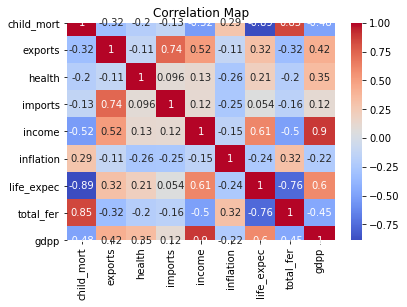

In [14]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
correlation = country_df_numeric.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

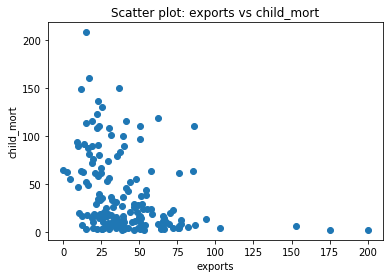

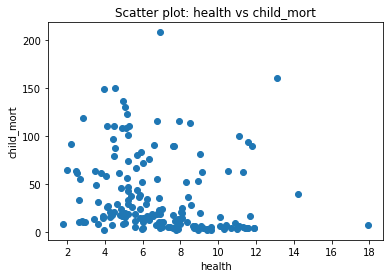

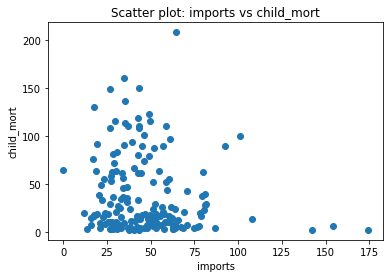

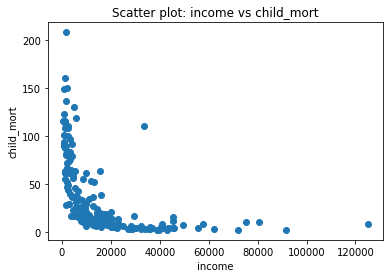

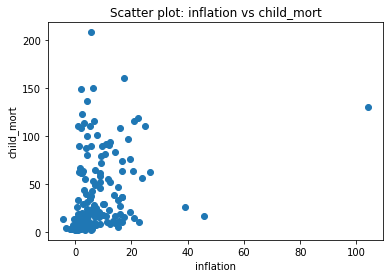

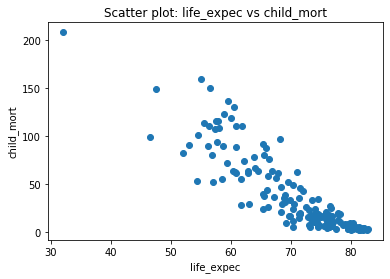

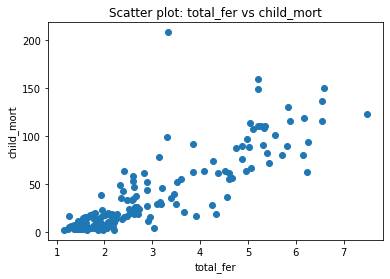

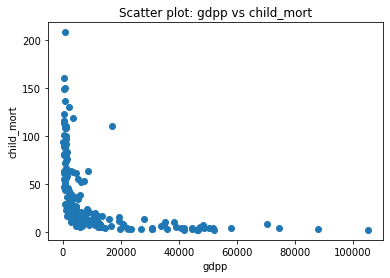

In [15]:
# Explore the continuous independent features against child_mort using scatter plots.
continuous_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

for feature in continuous_features:
    plt.scatter(country_df[feature], country_df['child_mort'])
    plt.xlabel(feature)
    plt.ylabel('child_mort')
    plt.title(f'Scatter plot: {feature} vs child_mort')
    plt.show()


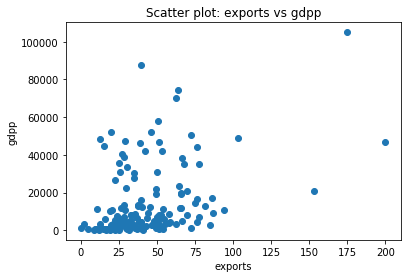

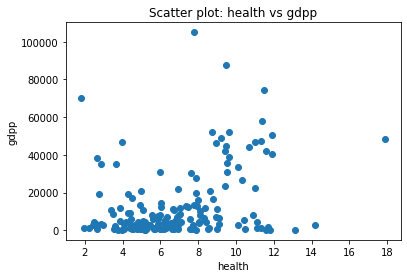

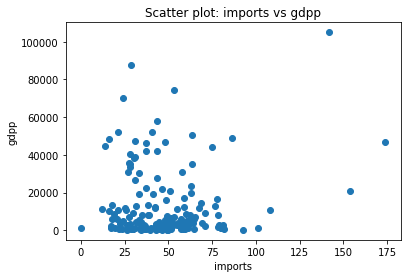

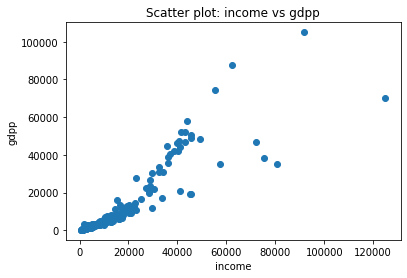

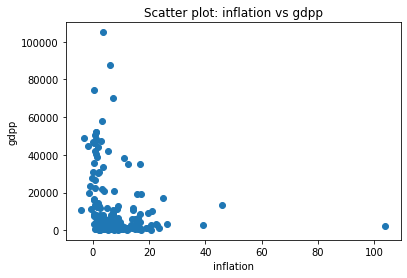

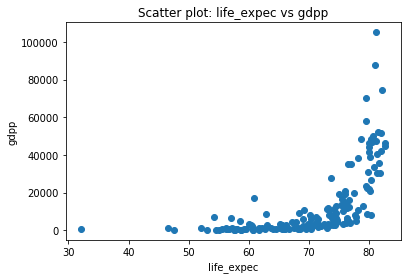

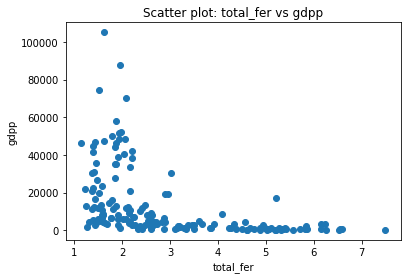

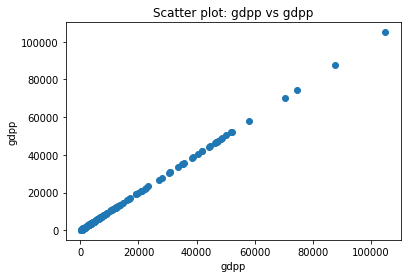

In [16]:
# Explore the continuous independent features against gdpp using scatter plots.
for feature in continuous_features:
    plt.scatter(country_df[feature], country_df['gdpp'])
    plt.xlabel(feature)
    plt.ylabel('gdpp')
    plt.title(f'Scatter plot: {feature} vs gdpp')
    plt.show()


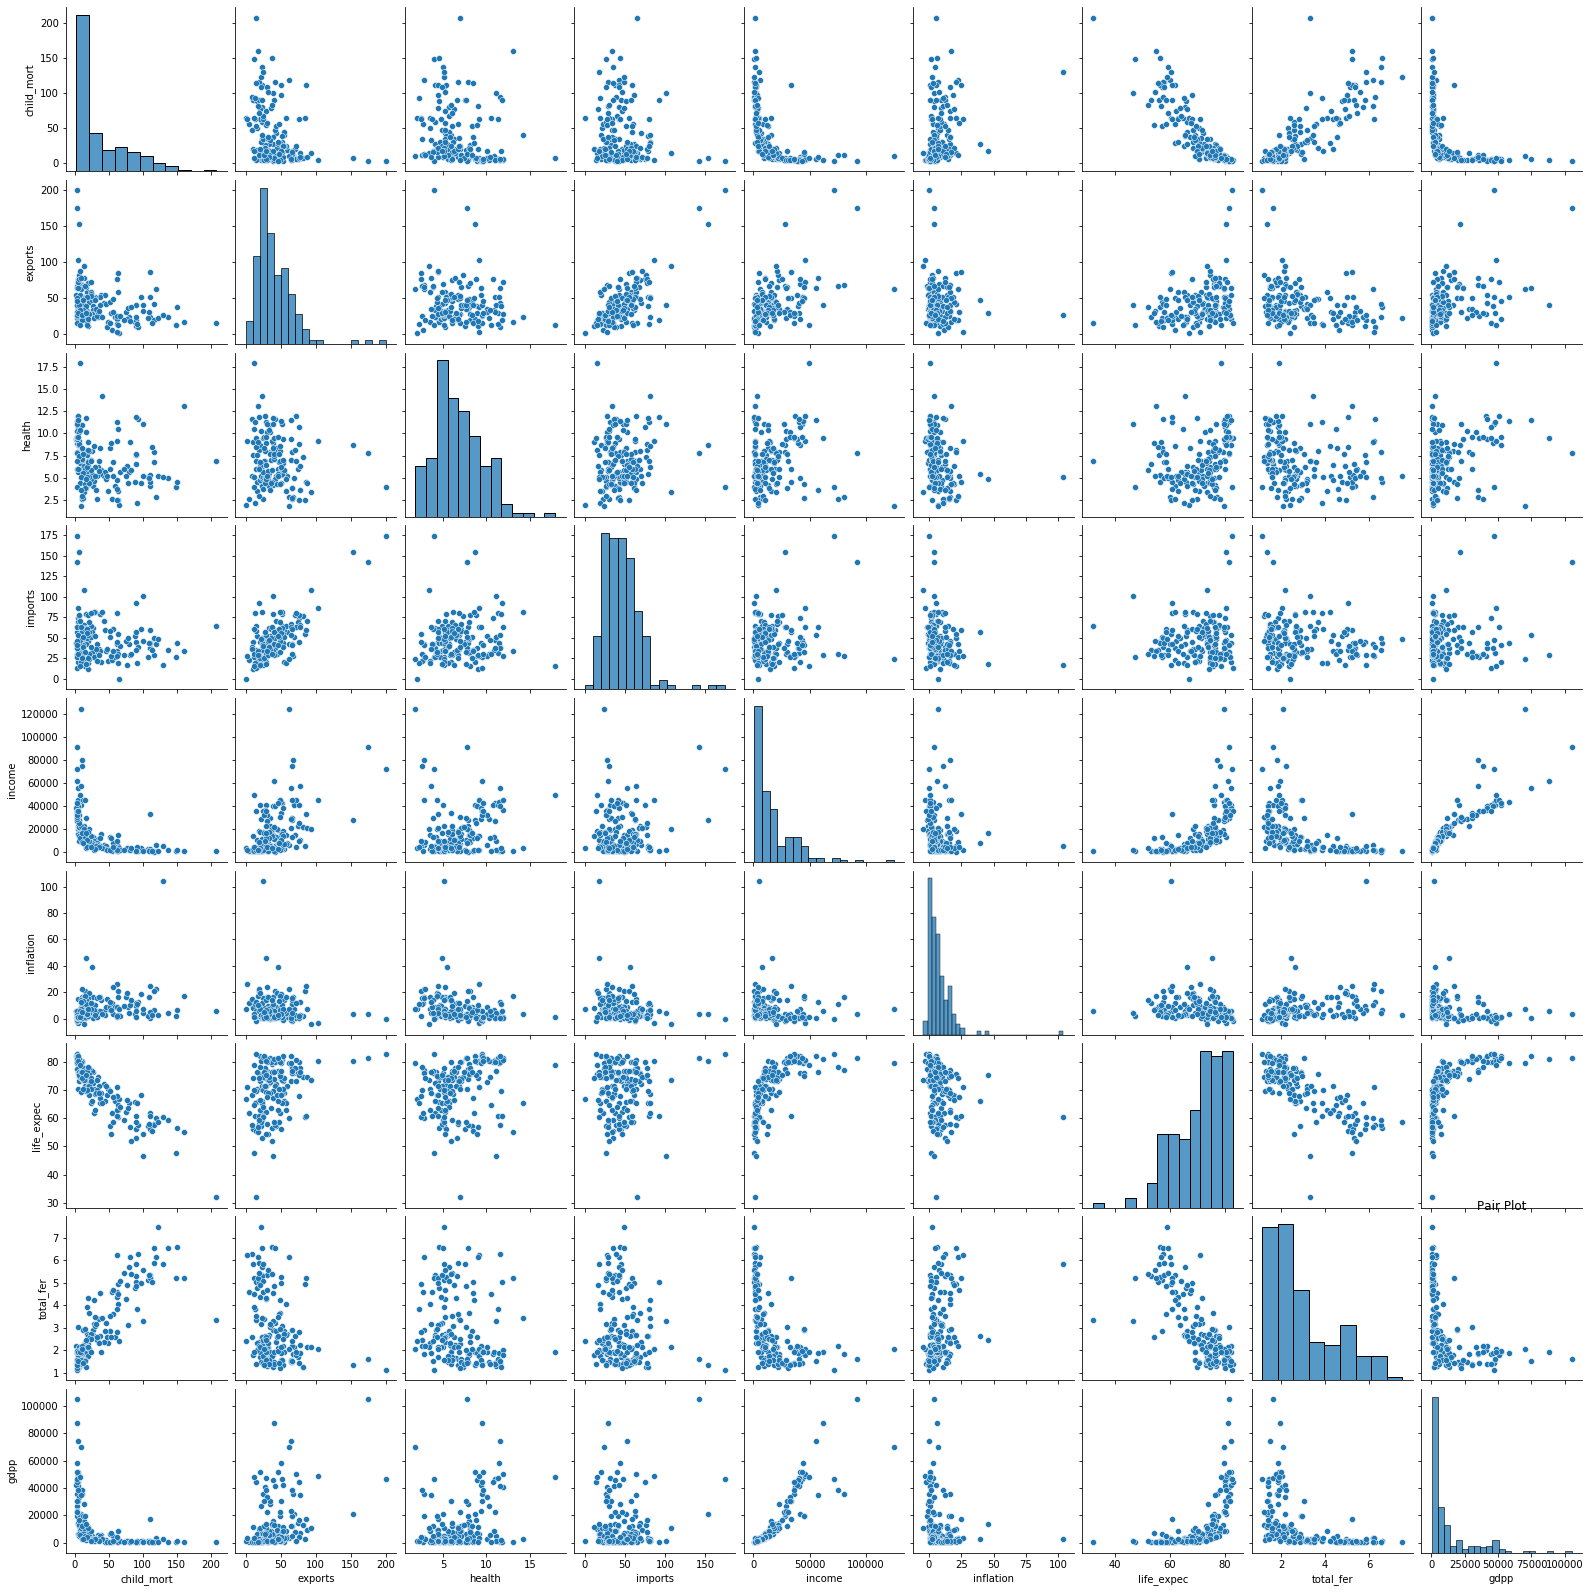

In [17]:
# Create a pair plot
# Hint: Explore seaborn pairplot
sns.pairplot(country_df_numeric)
plt.title('Pair Plot')
plt.show()


Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

### Scaling the Data

In [18]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(country_df_numeric), columns=country_df_numeric.columns)

# Display the first few rows of the normalized DataFrame
print(df_scaled.head())

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242  


## K-Means Clustering

### Selecting K

In [19]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled data set

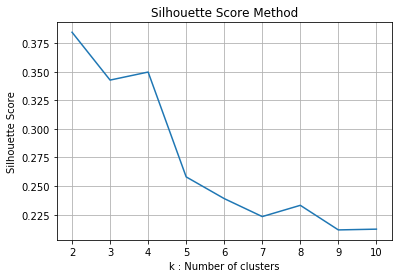

In [20]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.


We can choose the value of K that gives a good trade-off between a low distortion (smaller values on the elbow curve) and a high silhouette score (peak or plateau on the silhouette score curve). The exact value of K will depend on the specific dataset and problem at hand.

The elbow method suggests selecting the K value where the distortion (sum of squared distances within clusters) starts to level off or form an elbow-like bend. The silhouette score measures how well each data point fits within its assigned cluster, with values ranging from -1 to 1. Higher silhouette scores indicate better-defined clusters.

Therefore: I choose K = 4.

## Fitting a K-Means Model with the selected K value

In [24]:
# Remember to set the random_state to rseed

# Choose the optimal number of clusters (K)
optimal_k = 4

# Fit K-means clustering model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=rseed)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [25]:
# Count the number of records in each cluster

# Get the labels assigned to each data point
labels = kmeans.labels_


In [26]:
# Check model performance with the silhouette coefficient

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, labels)

# Print the silhouette score
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.34967581498248707


## Predictions

In [27]:
# Add the predicted cluster labels to the original DataFrame
country_df['cluster_label'] = labels

# Display the updated DataFrame
print(country_df.head())

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  cluster_label  
country                                                           
Afghanistan                56.2       5.82    553              1  
Albania                    76.3       1.65   4090              2  
Algeria                    76.5       2.89   4460              2  
Angola                     60.1       6.16   3530              1  
Antigua and Barbuda        76.8      

## Visualisation of clusters

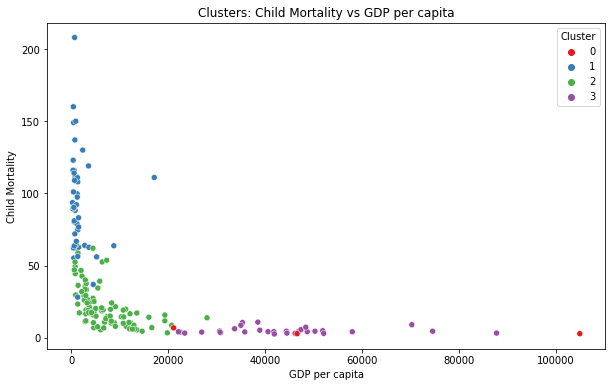

In [28]:
# Visualisation of clusters: child mortality vs gdpp
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_df, x='gdpp', y='child_mort', hue='cluster_label', palette='Set1')
plt.title('Clusters: Child Mortality vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Child Mortality')
plt.legend(title='Cluster')
plt.show()

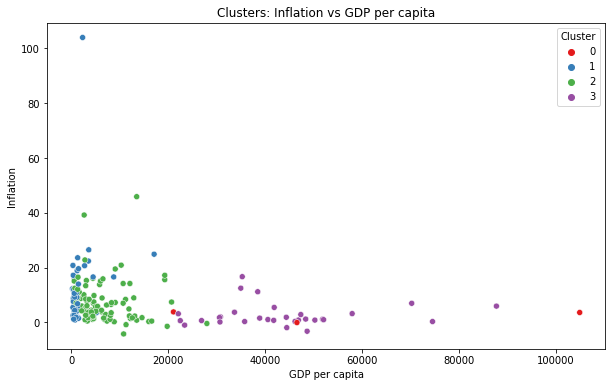

In [29]:
# Visualisation of clusters: inflation vs gdpp
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=country_df, x='gdpp', y='inflation', hue='cluster_label', palette='Set1')
plt.title('Clusters: Inflation vs GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Inflation')
plt.legend(title='Cluster')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Answer here:**

Based on the K-means clustering results and the provided DataFrame, we can label the groups of countries in the plots based on child mortality, GDP per capita (GDPP), and inflation. Here is one possible way to label the groups:

1. Cluster 0: Least Developed Countries
    * This cluster represents countries with high child mortality rates, low GDP per capita, and relatively high inflation. These countries are likely to be in the least developed category with limited economic development and significant challenges in healthcare and child well-being.

2. Cluster 1: Developing Countries
    * This cluster includes countries with high child mortality rates, low to moderate GDP per capita, and moderate to high inflation. These countries are in the process of development and face challenges in terms of child health and economic growth.

3. Cluster 2: Developing/Upper-Middle-Income Countries
    * This cluster consists of countries with relatively lower child mortality rates, moderate to high GDP per capita, and moderate inflation. These countries have made progress in reducing child mortality and have achieved a certain level of economic development, falling into the developing or upper-middle-income category.

4. Cluster 3: Developed/High-Income Countries
    * This cluster represents countries with low child mortality rates, high GDP per capita, and low inflation. These countries have achieved significant economic development, have well-established healthcare systems, and provide a higher standard of living for their citizens.
    
It's important to note that the specific labels and categorizations may vary depending on the context and the specific data used. The labels provided above are general descriptions based on the characteristics of the clusters in relation to child mortality, GDP per capita, and inflation.